# Analyze Detection Results
We can use the cocotools evaluation functionality to analyze classes individually and by size, but for our problem we additionally want to know every metric by distance and angle from the image center.

## Image Distortions
First, we need to make sure where the image center is located and whether the images are completely round or distorted along some axis.

This might be different for different datasets, let's focus on PIROPO first.

In [ ]:
%matplotlib inline
import math
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('/data/PIROPO/omni_3A/omni3A_test2/2015-05-12T12-43-53.052Z.jpg')
img1 = img.copy()
color = (0x7D, 0x9C, 0x17) #179C7D
color = (0xC3, 0xE5, 0x52) #52E5C3
size=4

# fig, ax = plt.subplots(1, 2, figsize=(3*size,8*size), sharex=True, sharey=True, frameon=False)

for distance in range(64, 321, 64):
    cv2.circle(img, (400, 300),  distance, color, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.savefig('images/evaluation_grid_orbits.png', bbox_inches='tight', pad_inches=0)
# plt.savefig('images/evaluation_grid_orbits.svg', bbox_inches='tight')

for angle in range(0, 360, 5):
    cv2.line(img1, (400, 300), (int(400+320*math.cos(angle/180*math.pi)), int(300+320*math.sin(angle/180*math.pi))), color, 2)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.savefig('images/evaluation_grid_rays.png', bbox_inches='tight', pad_inches=0)
# plt.savefig('images/evaluation_grid_rays.svg', bbox_inches='tight')

# plt.show()


Use `pycocotools` to do the analysis.

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.01s).
       size  metric        ap
0   overall  AP@.75  0.138581
1   overall  AP@.50  0.875175
2   overall   AP@.1  0.956781
3   overall      BG  0.980198
4   overall      FN  1.000000
5     large  AP@.75  0.030019
6     large  AP@.50  0.600175
7     large   AP@.1  0.851890
8     large      BG  0.940594
9     large      FN  1.000000
10   medium  AP@.75  0.134384
11   medium  AP@.50  0.913847
12   medium   AP@.1  0.972521
13   medium      BG  0.990099
14   medium      FN  1.000000
15    small  AP@.75  0.775632
16    small  AP@.50  0.983309
17    small   AP@.1  1.000000
18    small      BG  1.000000
19    small      FN  1.000000
creating index...
index created!
Running per image evaluation...
Evaluate a

AttributeError: 'PolarAxesSubplot' object has no attribute 'gca'

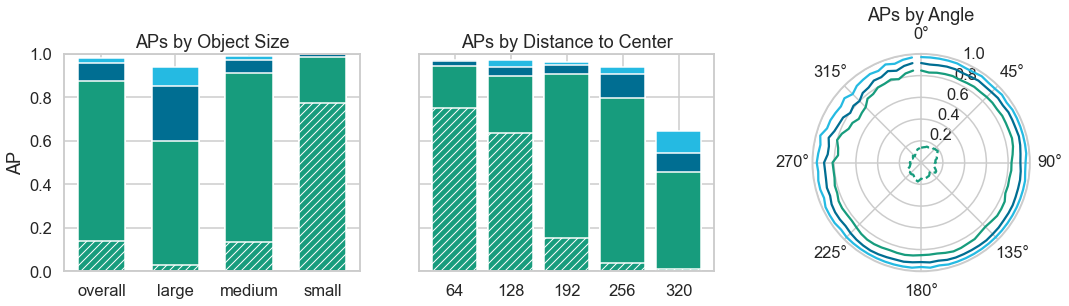

In [1]:
import copy
import os
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

from coco_error_analysis_fisheye import *

TEST_FILE='/data/PIROPO/omni_test2.json'
RES_DIR='analysis/gpa_10_01_100_01'

analyze_results(f'{RES_DIR}/.bbox.json', TEST_FILE, RES_DIR)

